In [1]:
import pandas as pd

In [18]:
df = pd.read_csv("../data/final experiment-table.csv", skiprows = 6)

# Dropping irrelevant columns
df = df.drop(['percentage-female', 'percentage-stationary-staff', 
              'percentage-children', 'alarm?', 'agents-at-start', 
              'verbose?', 'debug?', 'alerting-range', 'average-response-time',
              'people-in-building.1', 'staff-members-in-building.1', 
              'visitors-in-building.1', '[step]', 'max-turtles-per-patch'],1)
changes = {'precision ((count visitors with [evacuating? = false] / count visitors) * 100) 2': 'percentage_evacuating',
           '[run number]': 'run_number'}

# Renaming relevant column
df = df.rename(columns = changes)
df

,run_number,percentage-visitors-go-to-main-door,percentage_evacuating,people-in-building,evacuation-duration,event-duration,staff-members-in-building,visitors-in-building
0,6,0,100,450,0,0,50,400
1,6,0,100,450,0,1,50,400
2,6,0,100,450,0,2,50,400
3,6,0,100,450,0,3,50,400
4,6,0,100,450,0,4,50,400
...,...,...,...,...,...,...,...,...
175282,450,100,0,1,336,366,0,1
175283,450,100,0,1,337,367,0,1
175284,450,100,0,1,338,368,0,1
175285,450,100,0,1,339,369,0,1


In [31]:
run_averages = df.groupby(['run_number']).max()
run_averages

,percentage-visitors-go-to-main-door,percentage_evacuating,people-in-building,evacuation-duration,event-duration,staff-members-in-building,visitors-in-building
run_number,,,,,,,
1,0,97.74,450,394,424,50,400
2,0,99.24,450,349,379,50,400
3,0,98.75,450,388,418,50,400
4,0,98.99,450,354,384,50,400
5,0,95.75,450,330,360,50,400
...,...,...,...,...,...,...,...
446,100,97.75,450,356,386,50,400
447,100,99.5,450,348,378,50,400
448,100,98.5,450,335,365,50,400


In [32]:
evacuation_duration = run_averages.groupby(['percentage-visitors-go-to-main-door']).mean()
evacuation_duration

,people-in-building,evacuation-duration,event-duration,staff-members-in-building,visitors-in-building
percentage-visitors-go-to-main-door,,,,,
0,450.0,345.82,375.82,50.0,400.0
5,450.0,351.90,381.90,50.0,400.0
10,450.0,341.30,371.30,50.0,400.0
25,450.0,355.46,385.46,50.0,400.0
50,450.0,352.08,382.08,50.0,400.0
75,450.0,363.82,393.82,50.0,400.0
90,450.0,363.88,393.88,50.0,400.0
95,450.0,376.32,406.32,50.0,400.0
100,450.0,376.16,406.16,50.0,400.0


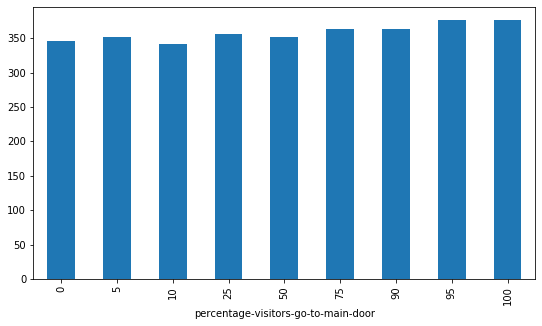

In [33]:
evacuation_duration['evacuation-duration'].plot.bar(figsize = (9,5))